<a href="https://colab.research.google.com/github/m-zayed5722/Miscellaneous-Projects/blob/main/DS_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from langchain.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.schema import Document

# Your documents
documents = [
    "Python is a popular programming language for AI and web development.",
    "Google Colab allows you to run Python notebooks in the cloud.",
    "FAISS is a library for efficient similarity search and clustering of dense vectors.",
    "RAG combines retrieval and generation to answer questions using external knowledge."
]

# Wrap them as LangChain Document objects
docs = [Document(page_content=d) for d in documents]

# Initialize OpenAI embeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-small", openai_api_key="xxx")

# Create a FAISS vector store from documents + embeddings
vectorstore = FAISS.from_documents(docs, embeddings)

# Create a RetrievalQA chain (retriever + LLM)
qa_chain = RetrievalQA.from_chain_type(
    llm=ChatOpenAI(model_name="gpt-3.5-turbo", openai_api_key="xxx", max_tokens=150),
    retriever=vectorstore.as_retriever(),
)

# Ask a question
question = "What is RAG?"
answer = qa_chain.run(question)
print("Answer:", answer)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example df
# df = pd.read_csv(...)

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Pick 2 random features
feat1, feat2 = np.random.choice(numeric_cols, 2, replace=False)

print("Selected features:", feat1, "and", feat2)

# Plot
plt.figure(figsize=(6,5))
plt.scatter(df[feat1], df[feat2])
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title(f'Scatter Plot of {feat1} vs {feat2}')
plt.grid(True)
plt.show()


In [ ]:
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
from typing import List, Optional
import uvicorn
import json
import random
import time

app = FastAPI(title="Reading Companion API - Simple Mode")

# CORS middleware
app.add_middleware(
    CORSMiddleware,
    allow_origins=["http://localhost:3000"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Load data on startup
books_data = []
gifts_data = []

@app.on_event("startup")
async def startup_event():
    global books_data, gifts_data
    with open('data/books.json', 'r', encoding='utf-8') as f:
        books_data = json.load(f)
    print(f"✓ Loaded {len(books_data)} books")


class RecommendationRequest(BaseModel):
    query: str
    store_filter: Optional[str] = None
    session_id: Optional[str] = None


class AnalyticsEvent(BaseModel):
    event_type: str
    session_id: str
    item_id: Optional[str] = None
    timestamp: Optional[float] = None


# Simple analytics storage
analytics_data = {
    'events': [],
    'sessions': {}
}


@app.get("/")
async def root():
    return {"message": "Reading Companion API - Simple Mode", "status": "running"}




In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

dishes = [
    "Margherita Pizza with mozzarella and basil",
    "Pepperoni Pizza with tomato sauce and cheese",
    "Chicken Biryani with basmati rice and spices",
    "Paneer Butter Masala with creamy tomato sauce",
    "Cheeseburger with beef patty and lettuce",
    "Veggie Burger with black beans and avocado"
]

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(dishes)

query = "chicken biryani"
query_emb = model.encode([query])
sim_scores = cosine_similarity(query_emb, embeddings)[0]

for dish, score in sorted(zip(dishes, sim_scores), key=lambda x: -x[1]):
    print(f"{dish}: {score:.3f}")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Chicken Biryani with basmati rice and spices: 0.756
Paneer Butter Masala with creamy tomato sauce: 0.391
Cheeseburger with beef patty and lettuce: 0.347
Pepperoni Pizza with tomato sauce and cheese: 0.315
Veggie Burger with black beans and avocado: 0.302
Margherita Pizza with mozzarella and basil: 0.280


In [ ]:
!git clone -q https://github.com/learnwithraghu/python-interview-question-de-ds-ai.git
%cd python-interview-question-de-ds-ai
!ls -lah
import pandas as pd

# Read a CSV file
df = pd.read_csv("dining_transactions.csv")

# Display the first few rows
print(df.head())

df.info()
df.describe()
(df.isnull().sum() / len(df)) * 100

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# might return: object
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].dtype

In [ ]:
!git clone -q https://github.com/learnwithraghu/python-interview-question-de-ds-ai.git

In [ ]:
%cd python-interview-question-de-ds-ai
!ls -lah


/content/python-interview-question-de-ds-ai
total 32K
drwxr-xr-x 5 root root 4.0K Oct 20 03:44 .
drwxr-xr-x 1 root root 4.0K Oct 20 03:44 ..
drwxr-xr-x 2 root root 4.0K Oct 20 03:44 generate_data
drwxr-xr-x 8 root root 4.0K Oct 20 03:44 .git
-rw-r--r-- 1 root root 2.8K Oct 20 03:44 hint_doc.md
-rw-r--r-- 1 root root 3.7K Oct 20 03:44 InterviewQuestion.md
-rw-r--r-- 1 root root 3.5K Oct 20 03:44 README.md
drwxr-xr-x 2 root root 4.0K Oct 20 03:44 solutions


In [ ]:
%cd generate_data/
!ls

/content/python-interview-question-de-ds-ai/generate_data
card_access_logs.json	 generate_case_data.py
dining_transactions.csv  passenger_manifest.csv


In [ ]:
!ls

card_access_logs.json	 generate_case_data.py
dining_transactions.csv  passenger_manifest.csv


In [ ]:
import pandas as pd

# Read a CSV file
df = pd.read_csv("dining_transactions.csv")

# Display the first few rows
print(df.head())

  transaction_id passenger_id              item  amount            timestamp
0           T001         P001   Seafood Platter   45.99  2024-02-20 19:30:00
1           T002         P002  Vegetarian Pasta   28.50  2024-02-20 20:15:00
2           T004         P004             Steak   52.99  2024-02-20 20:00:00
3           T005         P005      Fish Special   38.99  2024-02-20 19:45:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  4 non-null      object 
 1   passenger_id    4 non-null      object 
 2   item            4 non-null      object 
 3   amount          4 non-null      float64
 4   timestamp       4 non-null      object 
dtypes: float64(1), object(4)
memory usage: 292.0+ bytes


In [ ]:
df.describe()

,amount
count,4.00000
mean,41.61750
std,10.44709
min,28.50000
25%,36.36750
50%,42.49000
75%,47.74000
max,52.99000


In [ ]:
(df.isnull().sum() / len(df)) * 100

,0
transaction_id,0.0
passenger_id,0.0
item,0.0
amount,0.0
timestamp,0.0


In [ ]:
df.isnull().sum().sum()

np.int64(0)

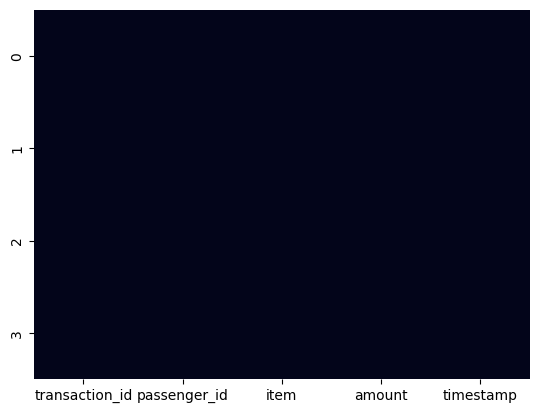

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [ ]:
# might return: object
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].dtype

dtype('<M8[ns]')

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df.dtypes

,0
transaction_id,object
passenger_id,object
item,object
amount,float64
timestamp,datetime64[ns]


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Convert to DataFrame for convenience
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
print(pca_df.head())
plt.figure(figsize=(6,5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.grid(True)
plt.show()


ValueError: could not convert string to float: 'T001'

In [ ]:
###############################################################################################################
###############################################################################################################

In [ ]:
# Read a CSV file
df2 = pd.read_csv("passenger_manifest.csv")

# Display the first few rows
print(df2.head())

  passenger_id             name cabin dining_preference  age nationality
0         P001     James Wilson  A123             Early   45     British
1         P002  Elena Rodriguez  B145              Late   32     Spanish
2         P003       Sarah Chen  A125             Early   28     Chinese
3         P004    Michael Brown  C201              Late   52    American
4         P005    Lisa Thompson  B147             Early   39    Canadian


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   passenger_id       5 non-null      object
 1   name               5 non-null      object
 2   cabin              5 non-null      object
 3   dining_preference  5 non-null      object
 4   age                5 non-null      int64 
 5   nationality        5 non-null      object
dtypes: int64(1), object(5)
memory usage: 372.0+ bytes


In [ ]:
df2.describe()

,age
count,5.000000
mean,39.200000
std,9.679876
min,28.000000
25%,32.000000
50%,39.000000
75%,45.000000
max,52.000000


In [ ]:
(df2.isnull().sum() / len(df2)) * 100

,0
passenger_id,0.0
name,0.0
cabin,0.0
dining_preference,0.0
age,0.0
nationality,0.0


In [ ]:
df2.isnull().sum().sum()

np.int64(0)

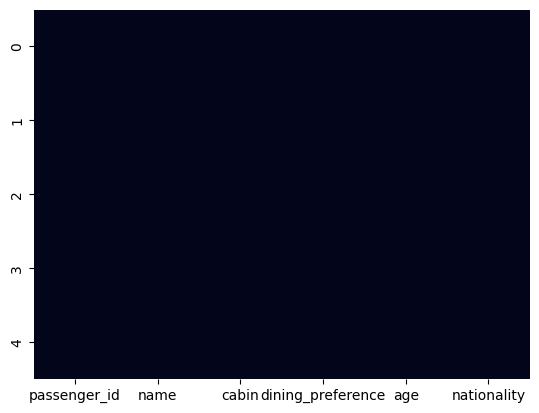

In [ ]:
sns.heatmap(df2.isnull(), cbar=False)
plt.show()

In [ ]:
df2['timestamp'].dtype
# might return: object


KeyError: 'timestamp'

In [ ]:
########################################################################################################################
########################################################################################################################

In [ ]:
# Read a JSON file into a DataFrame
df3 = pd.read_json("card_access_logs.json")

# Show the first few rows
print(df3.head())

            timestamp passenger_id     location action
0 2024-02-20 19:00:00         P001        Cabin  entry
1 2024-02-20 19:00:00         P002        Cabin  entry
2 2024-02-20 19:00:00         P004        Cabin  entry
3 2024-02-20 19:00:00         P005        Cabin  entry
4 2024-02-20 20:00:00         P001  Dining Hall   exit


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     20 non-null     datetime64[ns]
 1   passenger_id  20 non-null     object        
 2   location      20 non-null     object        
 3   action        20 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 772.0+ bytes


In [ ]:
df3.describe()

,timestamp
count,20
mean,2024-02-20 21:00:00
min,2024-02-20 19:00:00
25%,2024-02-20 20:00:00
50%,2024-02-20 21:00:00
75%,2024-02-20 22:00:00
max,2024-02-20 23:00:00


In [ ]:
(df3.isnull().sum() / len(df3)) * 100

,0
timestamp,0.0
passenger_id,0.0
location,0.0
action,0.0


In [ ]:
df3.isnull().sum().sum()

np.int64(0)

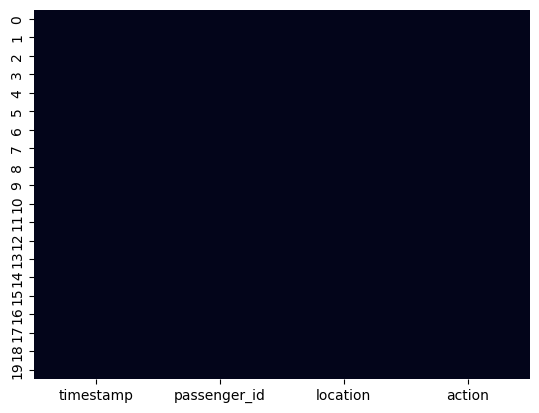

In [ ]:
sns.heatmap(df3.isnull(), cbar=False)
plt.show()

In [ ]:
# might return: object
df3['timestamp'] = pd.to_datetime(df3['timestamp'])
df3['timestamp'].dtype


dtype('<M8[ns]')

In [ ]:
import pandas as pd
from pandas import json_normalize

# Load JSON
with open('card_access_logs.json') as f:
    df4 = pd.read_json(f)

# Flatten nested fields
df_flat = pd.json_normalize(df4, sep='_')  # sep defines nested column names


In [ ]:
df_flat

""
0
1
2
3


In [ ]:
df_combined = pd.concat([df, df2, df3], ignore_index=True)

In [ ]:
df_combined.head()

,transaction_id,passenger_id,item,amount,timestamp,name,cabin,dining_preference,age,nationality,location,action
0,T001,P001,Seafood Platter,45.99,2024-02-20 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T002,P002,Vegetarian Pasta,28.50,2024-02-20 20:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T004,P004,Steak,52.99,2024-02-20 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T005,P005,Fish Special,38.99,2024-02-20 19:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,P001,NaN,NaN,NaT,James Wilson,A123,Early,45.0,British,NaN,NaN


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     4 non-null      object        
 1   passenger_id       29 non-null     object        
 2   item               4 non-null      object        
 3   amount             4 non-null      float64       
 4   timestamp          24 non-null     datetime64[ns]
 5   name               5 non-null      object        
 6   cabin              5 non-null      object        
 7   dining_preference  5 non-null      object        
 8   age                5 non-null      float64       
 9   nationality        5 non-null      object        
 10  location           20 non-null     object        
 11  action             20 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 2.8+ KB


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_combined.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'T001'

In [ ]:
import numpy as np

# Example matrix (5x5)

sns.heatmap(df_combined, cmap='viridis', annot=True)
plt.title('General Heatmap')
plt.show()


ValueError: could not convert string to float: 'T001'

In [ ]:
# Show the first ~2000 chars of the task doc
#!sed -n '1,150p' InterviewQuestion.md


In [ ]:
from glob import glob
csvs  = glob("**/*.csv", recursive=True)
jsons = glob("**/*.json", recursive=True)
csvs, jsons


(['generate_data/dining_transactions.csv',
  'generate_data/passenger_manifest.csv'],
 ['generate_data/card_access_logs.json'])

In [ ]:
for col in df.select_dtypes('object'):
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head())

In [ ]:
df.groupby('Category')['Sales'].mean()
df.groupby('Region').agg({'Sales': ['mean', 'sum']})

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
proj = pca.fit_transform(df.select_dtypes('number'))
plt.scatter(proj[:,0], proj[:,1])
plt.title('PCA projection')
plt.show()

In [ ]:
df.shape
df.info()
df.describe(include='all')
df.isnull().sum()
sns.heatmap(df.corr(numeric_only=True), annot=True)
sns.pairplot(df)
